# Census Income

### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('census.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Exploratory Data Analysis

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.sample(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
29916,33,Private,554206,Some-college,10,Never-married,Tech-support,Not-in-family,Black,Male,0,0,40,Philippines,<=50K
29054,43,Private,351576,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,>50K
9675,70,Self-emp-not-inc,155141,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2377,12,United-States,>50K
21467,39,Private,150061,Masters,14,Divorced,Exec-managerial,Unmarried,Black,Female,15020,0,60,United-States,>50K
11390,58,?,147653,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,36,United-States,<=50K
22794,25,?,126797,HS-grad,9,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
5083,41,Private,279297,HS-grad,9,Never-married,Sales,Not-in-family,Black,Female,0,0,60,United-States,<=50K
12559,34,Private,303187,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
12418,24,Private,182342,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,<=50K
12114,25,Private,178421,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,<=50K


In [7]:
df.shape

(32560, 15)

This data set has 32560 rows and 15 columns

In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

This dataset has int64 and object type columns

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [11]:
df.isnull()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null values present in the dataset

In [13]:
df['Age'].nunique()

73

There are 73 unique age values are present

In [14]:
df['Workclass'].nunique()

9

There are 9 unique workclass values are present

In [15]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [16]:
df['Fnlwgt'].nunique()

21647

In [17]:
df['Education'].nunique()

16

There are 16 unique Education values are present

In [18]:
df['Education'].unique().tolist()

[' Bachelors',
 ' HS-grad',
 ' 11th',
 ' Masters',
 ' 9th',
 ' Some-college',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' 7th-8th',
 ' Doctorate',
 ' Prof-school',
 ' 5th-6th',
 ' 10th',
 ' 1st-4th',
 ' Preschool',
 ' 12th']

In [19]:
df['Education_num'].nunique()

16

There are 16 unique Education_num values are present

In [20]:
df['Education_num'].unique().tolist()

[13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6, 2, 1, 8]

In [21]:
df['Marital_status'].nunique()

7

There are 7 unique marital_status values are present

In [22]:
df['Marital_status'].unique().tolist()

[' Married-civ-spouse',
 ' Divorced',
 ' Married-spouse-absent',
 ' Never-married',
 ' Separated',
 ' Married-AF-spouse',
 ' Widowed']

In [23]:
df['Occupation'].nunique()

15

In [24]:
df['Occupation'].unique().tolist()

[' Exec-managerial',
 ' Handlers-cleaners',
 ' Prof-specialty',
 ' Other-service',
 ' Adm-clerical',
 ' Sales',
 ' Craft-repair',
 ' Transport-moving',
 ' Farming-fishing',
 ' Machine-op-inspct',
 ' Tech-support',
 ' ?',
 ' Protective-serv',
 ' Armed-Forces',
 ' Priv-house-serv']

There are 15 different types of occupation where people are engaged in

In [25]:
df['Relationship'].nunique()

6

In [26]:
df['Relationship'].unique().tolist()

[' Husband',
 ' Not-in-family',
 ' Wife',
 ' Own-child',
 ' Unmarried',
 ' Other-relative']

There are 6 types of diffenent relationship present

In [27]:
df['Race'].nunique()

5

In [28]:
df['Race'].unique().tolist()

[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']

There are people of 5 different types of Race are present

In [29]:
df['Sex'].nunique()

2

In [30]:
df['Sex'].unique().tolist()

[' Male', ' Female']

In [31]:
df['Capital_gain'].nunique()

119

In [32]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [33]:
df['Capital_loss'].nunique()

92

In [34]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [35]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [36]:
df['Hours_per_week'].nunique()

94

In [37]:
df['Native_country'].nunique()

42

In [38]:
df['Income'].nunique()

2

In [39]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [41]:
df['Age'].mean()

38.581633906633904

In [42]:
df['Age'].median()

37.0

In [43]:
df['Age'].mode()

0    36
Name: Age, dtype: int64

In [44]:
df['Age'].min()

17

In [45]:
df['Age'].max()

90

The min age values is 17 and max age is 90, mean of all the age is 38 and median is 37 and mode is 36

In [47]:
df['Fnlwgt'].mean()

189781.81437346438

In [48]:
df['Fnlwgt'].median()

178363.0

In [49]:
df['Fnlwgt'].mode()

0    123011
1    164190
2    203488
Name: Fnlwgt, dtype: int64

In [50]:
df['Fnlwgt'].min()

12285

In [51]:
df['Fnlwgt'].max()

1484705

The min Fnlwgt values is 12285 and max Fnlwgt is 1484705, mean of all the Fnlwgt is 189781.81437346438 and median is 178363.0 and mode is 0    123011
1    164190
2    203488

In [52]:
df['Education_num'].mean()

10.08058968058968

In [53]:
df['Education_num'].median()

10.0

In [54]:
df['Education_num'].mode()

0    9
Name: Education_num, dtype: int64

In [55]:
df['Education_num'].min()

1

In [56]:
df['Education_num'].max()

16

The min Education_num values is 1 and max Education_num is 16, mean of all the Education_num is 10.08 and median is 10 and mode is 0 9

In [57]:
df['Capital_gain'].mean()

1077.615171990172

In [58]:
df['Capital_gain'].median()

0.0

In [59]:
df['Capital_gain'].mode()

0    0
Name: Capital_gain, dtype: int64

In [60]:
df['Capital_gain'].min()

0

In [61]:
df['Capital_gain'].max()

99999

The min Capital_gain values is 0 and max Capital_gain is 99999, mean of all the Capital_gain is 1077.61 and median is 0.0 and mode is 0 0

In [62]:
df['Capital_loss'].mean()

87.30651105651106

In [63]:
df['Capital_loss'].median()

0.0

In [64]:
df['Capital_loss'].mode()

0    0
Name: Capital_loss, dtype: int64

In [65]:
df['Capital_loss'].min()

0

In [66]:
df['Capital_loss'].max()

4356

The min Capital_loss values is 0 and max Capital_loss is 4356, mean of all the Capital_loss is 87.30 and median is 0.0 and mode is 0 0

In [67]:
df['Hours_per_week'].mean()

40.437469287469284

In [68]:
df['Hours_per_week'].median()

40.0

In [69]:
df['Hours_per_week'].mode()

0    40
Name: Hours_per_week, dtype: int64

In [70]:
df['Hours_per_week'].min()

1

In [71]:
df['Hours_per_week'].max()

99

The min Hours_per_week values is 1 and max Hours_per_week is 99, mean of all the Hours_per_week is 40.43 and median is 40.0 and mode is 0 40

In [72]:
df['Workclass'].mode()

0     Private
Name: Workclass, dtype: object

In [73]:
df['Workclass'].min()

' ?'

In [74]:
df['Workclass'].max()

' Without-pay'

In [75]:
df['Education'].mode()

0     HS-grad
Name: Education, dtype: object

In [76]:
df['Education'].min()

' 10th'

In [77]:
df['Education'].max()

' Some-college'

In [78]:
df['Marital_status'].mode()

0     Married-civ-spouse
Name: Marital_status, dtype: object

In [79]:
df['Marital_status'].min()

' Divorced'

In [80]:
df['Marital_status'].max()

' Widowed'

In [82]:
df['Race'].min()

' Amer-Indian-Eskimo'

In [83]:
df['Race'].max()

' White'

In [84]:
df['Native_country'].mode()

0     United-States
Name: Native_country, dtype: object

In [85]:
df['Native_country'].min()

' ?'

In [86]:
df['Native_country'].max()

' Yugoslavia'

In [87]:
df['Sex'].mode()

0     Male
Name: Sex, dtype: object

In [88]:
df['Sex'].min()

' Female'

In [89]:
df['Sex'].max()

' Male'

In [90]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [91]:
df.nunique().to_frame('No of unique values')

,No of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [92]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Visualization

### Univariate Analysis

In [93]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

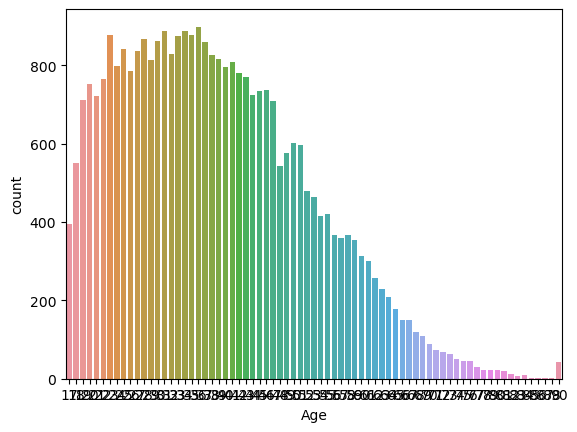

In [94]:
sns.countplot(df['Age'])
df['Age'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

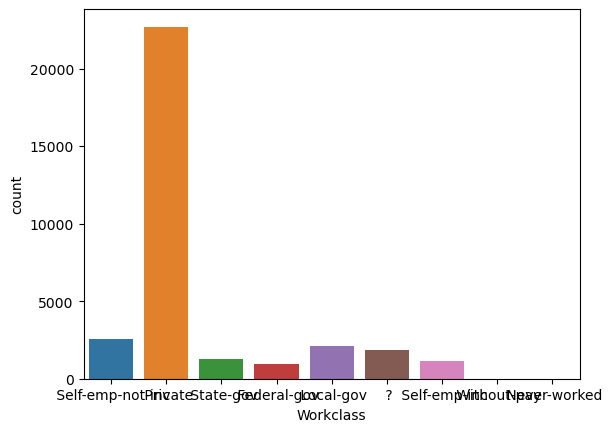

In [95]:
sns.countplot(df['Workclass'])
df['Workclass'].value_counts()

Highest no of people belonging to Private workclass and lowest no of people belonging to never worked group

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

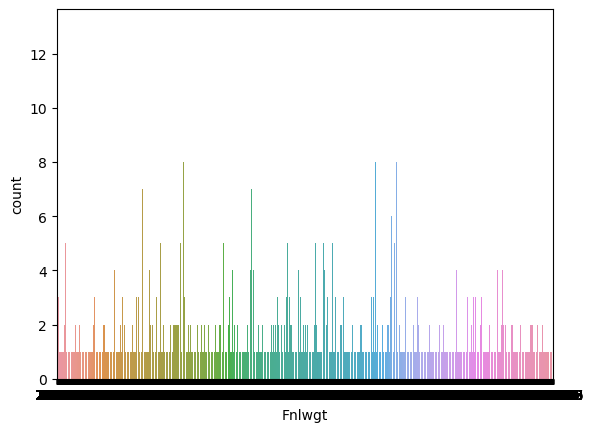

In [96]:
sns.countplot(df['Fnlwgt'])
df['Fnlwgt'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

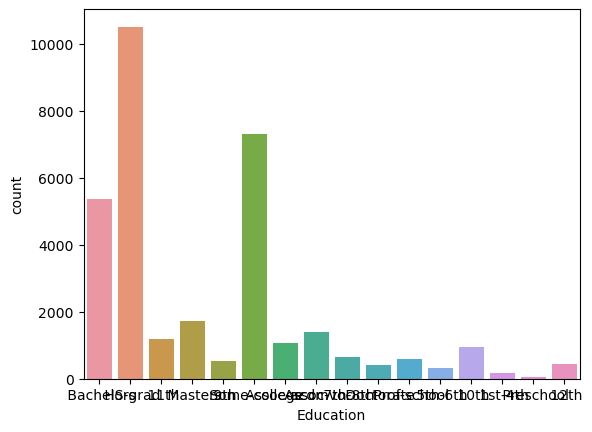

In [97]:
sns.countplot(df['Education'])
df['Education'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

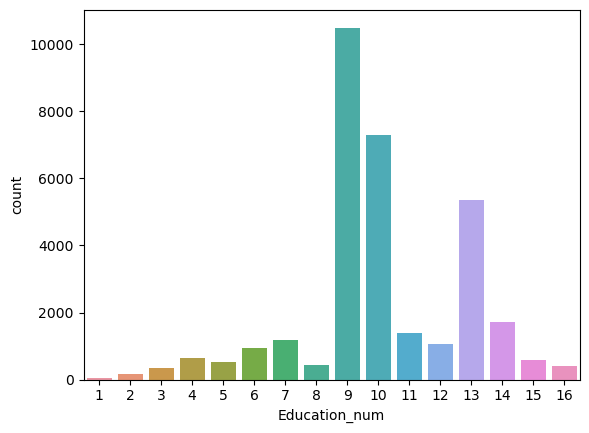

In [98]:
sns.countplot(df['Education_num'])
df['Education_num'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

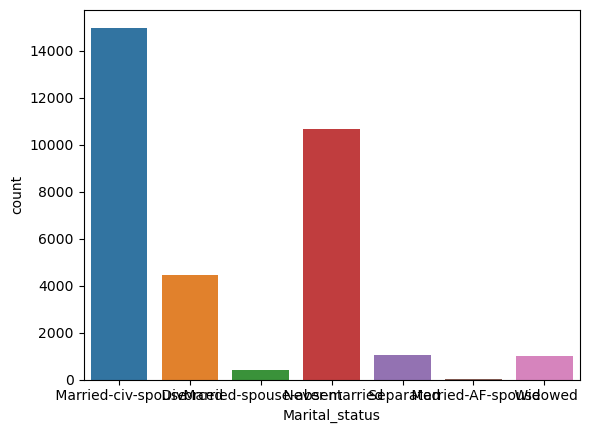

In [99]:
sns.countplot(df['Marital_status'])
df['Marital_status'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

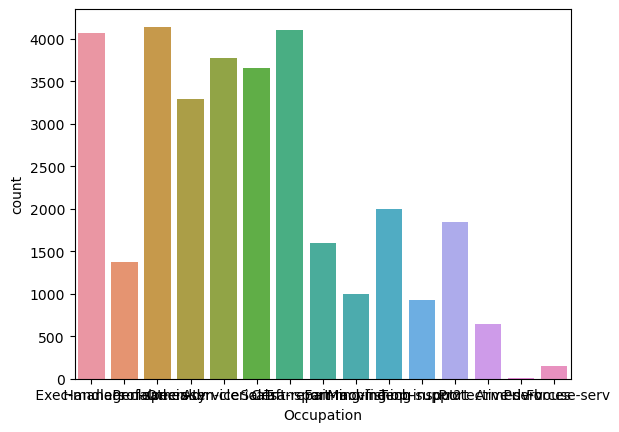

In [100]:
sns.countplot(df['Occupation'])
df['Occupation'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

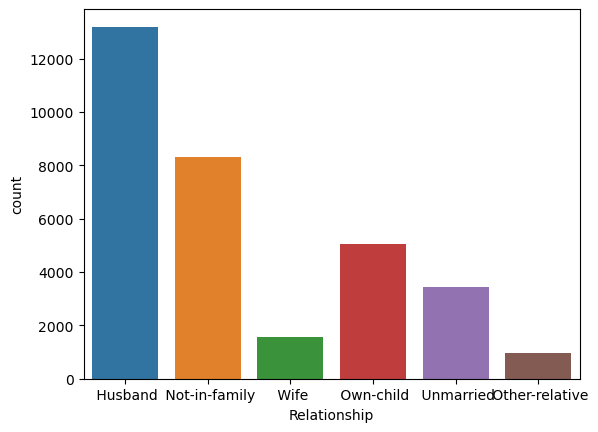

In [101]:
sns.countplot(df['Relationship'])
df['Relationship'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

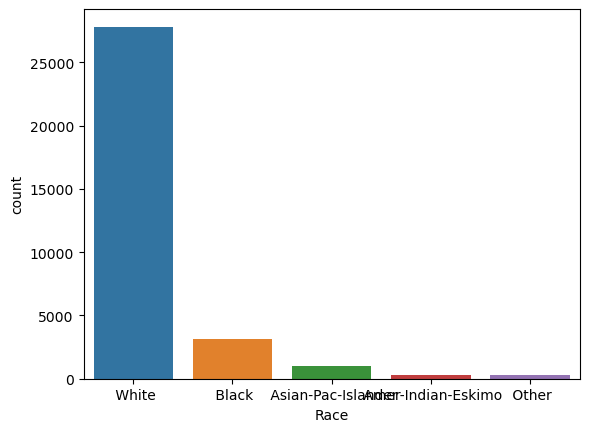

In [102]:
sns.countplot(df['Race'])
df['Race'].value_counts()

Among the race white people are more as compared to other race people

 Male      21789
 Female    10771
Name: Sex, dtype: int64

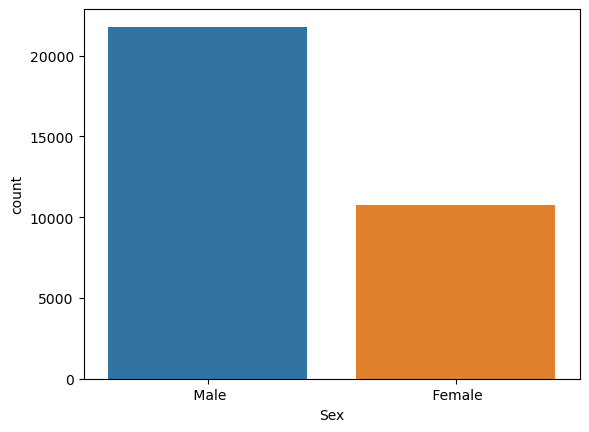

In [103]:
sns.countplot(df['Sex'])
df['Sex'].value_counts()

The count of male is higher than count of female

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

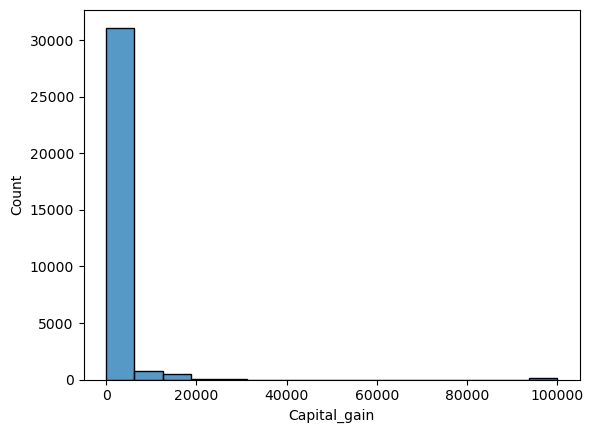

In [104]:
sns.histplot(df['Capital_gain'])
df['Capital_gain'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

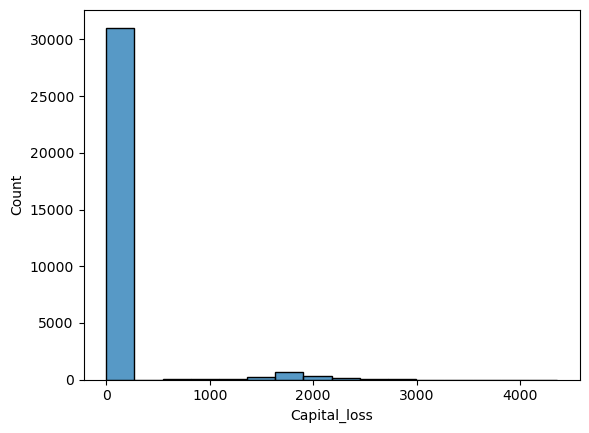

In [105]:
sns.histplot(df['Capital_loss'])
df['Capital_loss'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

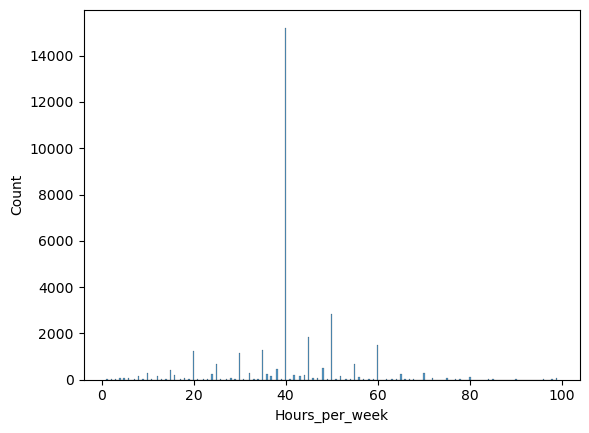

In [106]:
sns.histplot(df['Hours_per_week'])
df['Hours_per_week'].value_counts()

<AxesSubplot:xlabel='Native_country', ylabel='Count'>

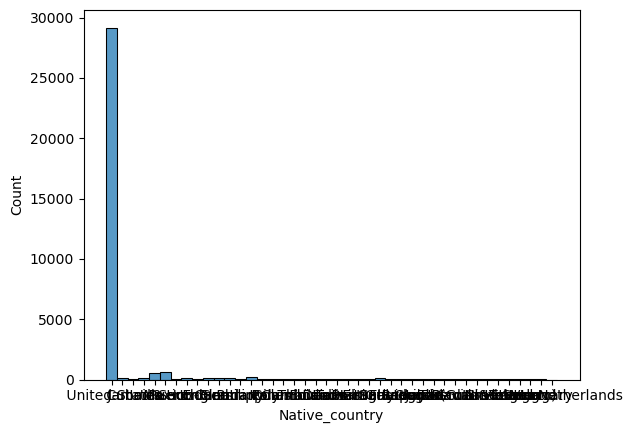

In [107]:
sns.histplot(df['Native_country'])

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

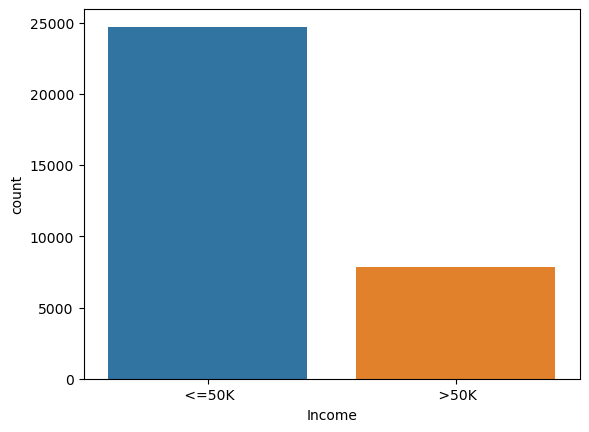

In [108]:
sns.countplot(df['Income'])
df['Income'].value_counts()

Count of people having income greater than 50k is lower than that of greated than 50k

## Bivariate Analysis

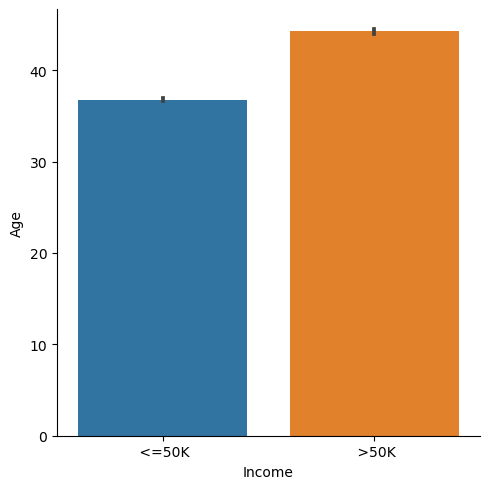

In [111]:
sns.catplot(y='Age',x='Income',data=df,kind='bar')
plt.show()

The income of people above age 35 has income more than 50k than others 

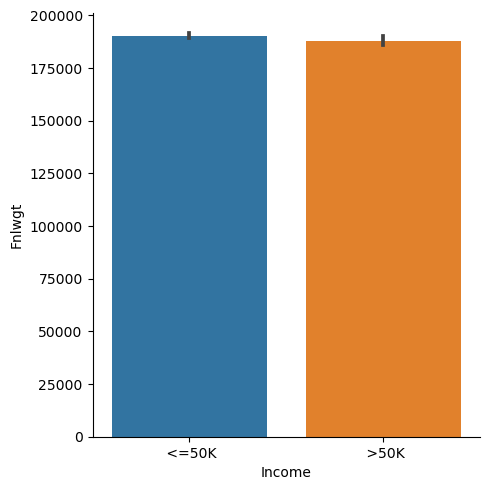

In [112]:
sns.catplot(y='Fnlwgt',x='Income',data=df,kind='bar')
plt.show()

### Multivariate Analysis

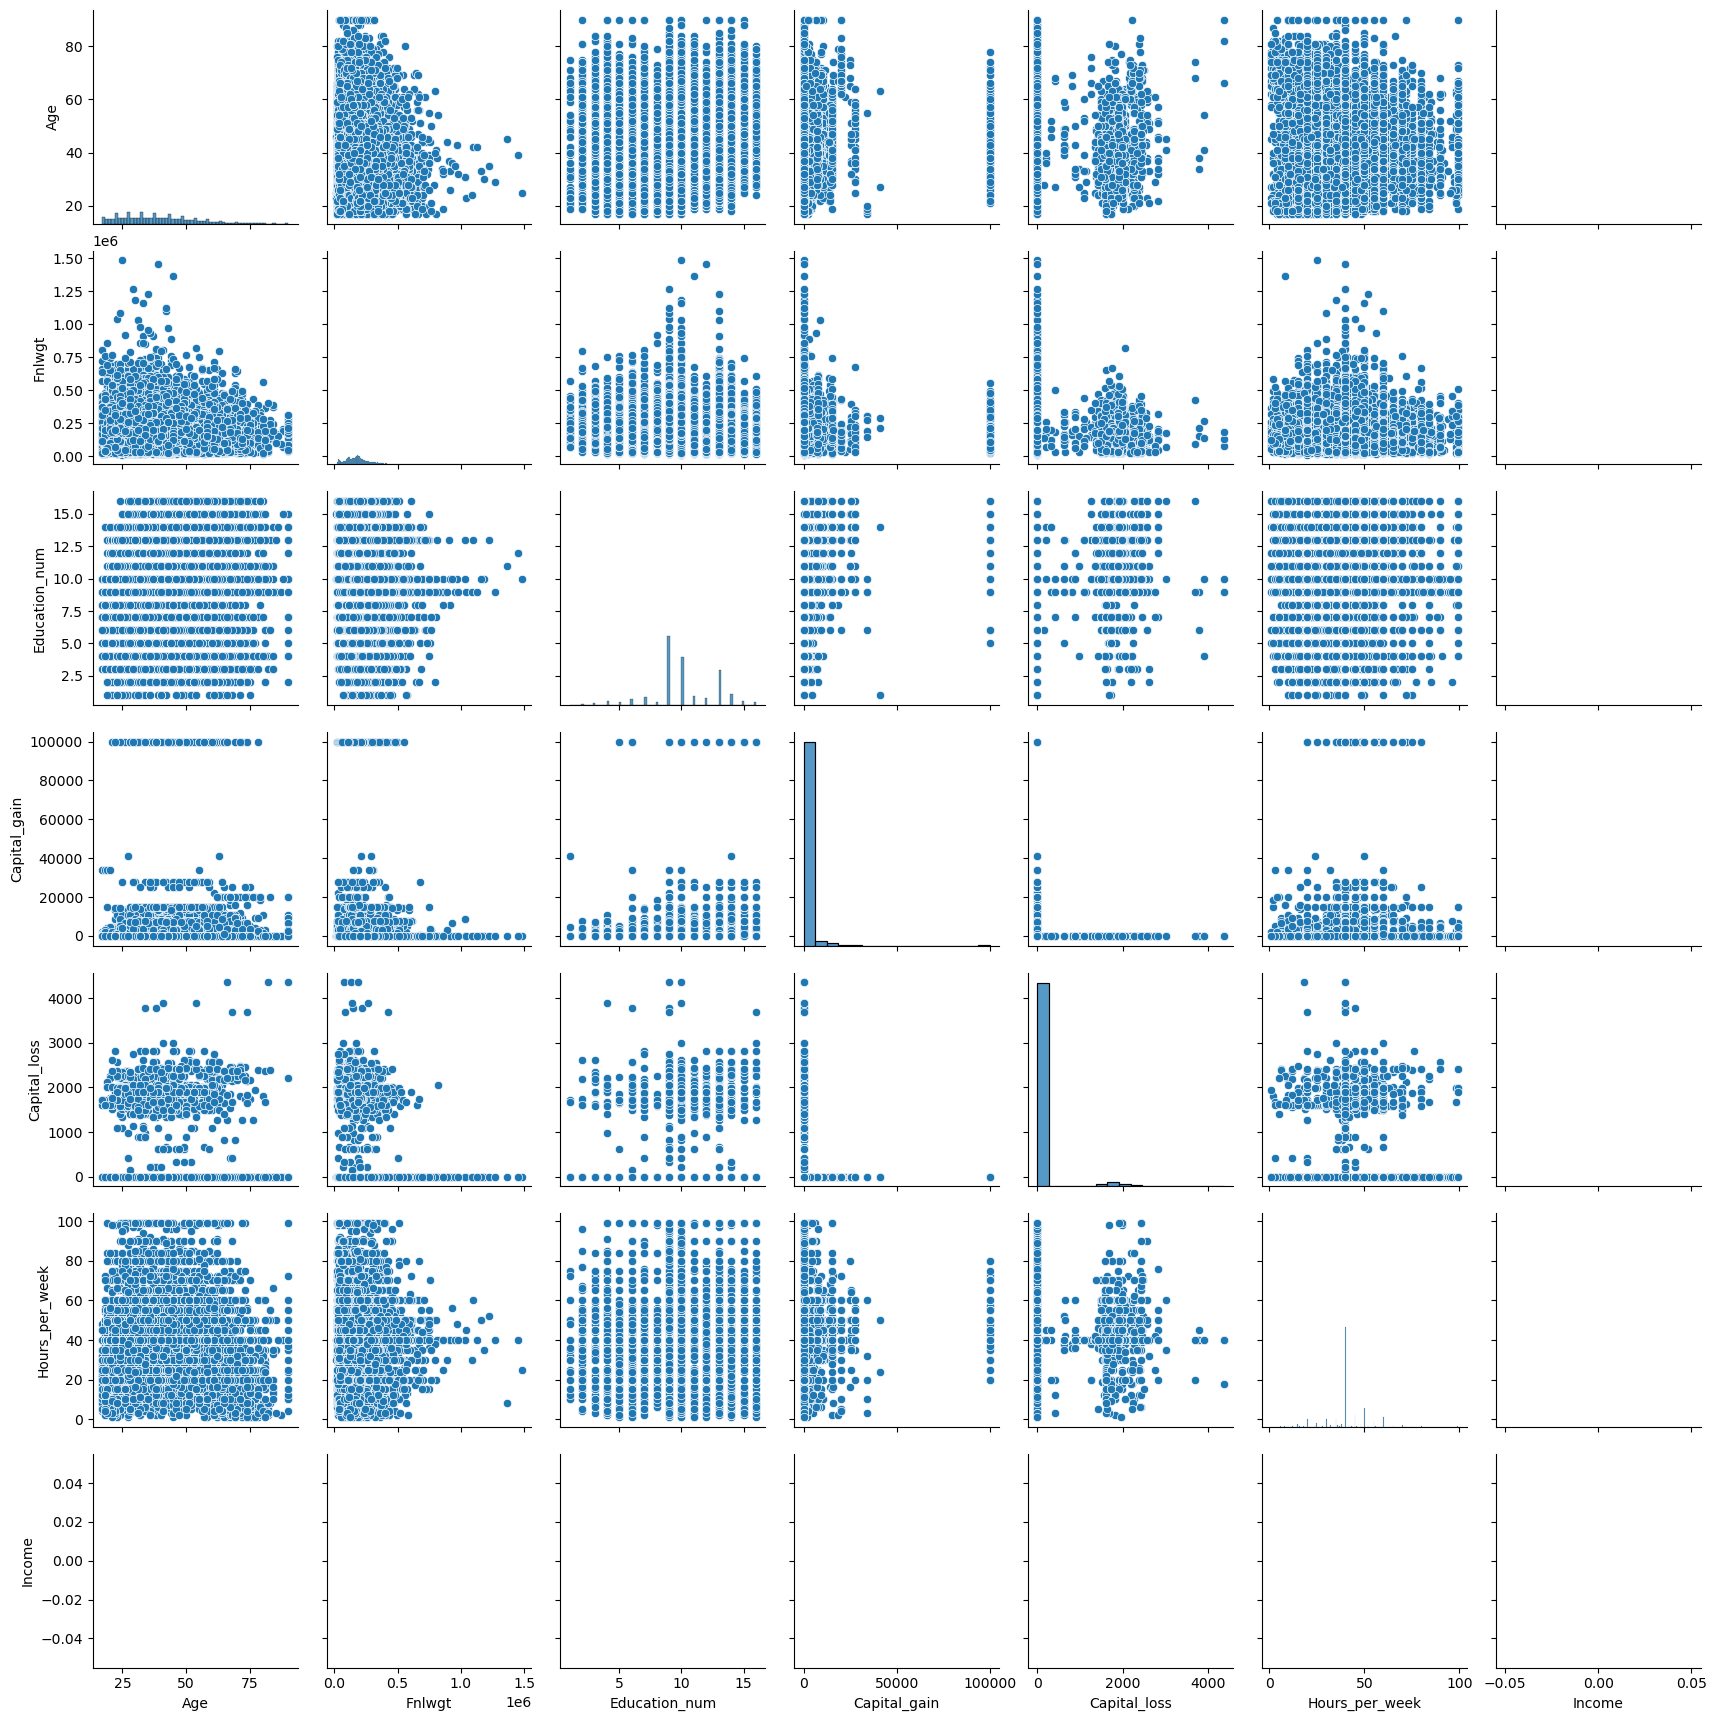

In [158]:
sns.pairplot(df)

In [114]:
corr=df.corr
corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


## Separating Numerical and Categorical Column

In [116]:
num_cols=df.select_dtypes(include=[np.number])
num_cols

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [117]:
cat_cols=df.select_dtypes(exclude=[np.number])
cat_cols

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


## Plotting Outliers

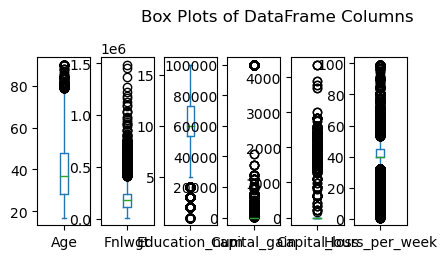

In [118]:
plt.figure
num_cols.plot(kind='box',subplots=True,layout=(2,8))
plt.suptitle("Box Plots of DataFrame Columns")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age'>

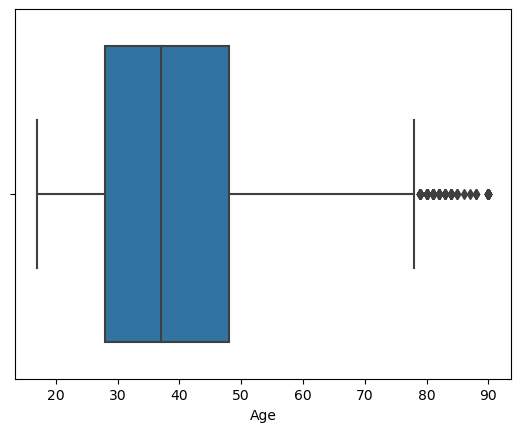

In [119]:
sns.boxplot(num_cols['Age'])

<AxesSubplot:xlabel='Fnlwgt'>

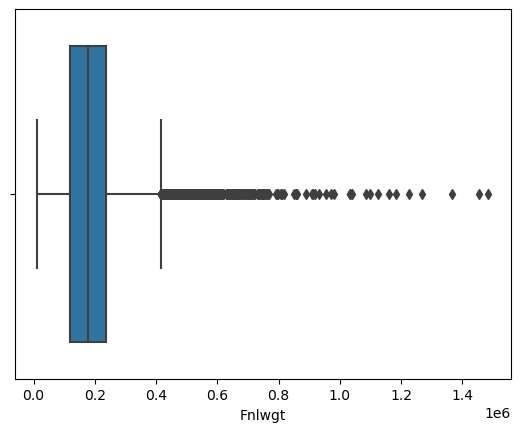

In [120]:
sns.boxplot(num_cols['Fnlwgt'])

<AxesSubplot:xlabel='Education_num'>

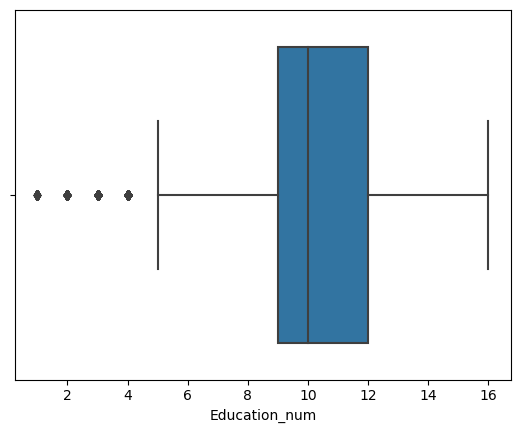

In [121]:
sns.boxplot(num_cols['Education_num'])

<AxesSubplot:xlabel='Capital_gain'>

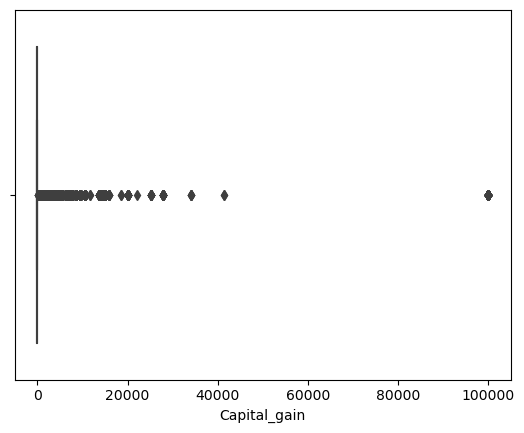

In [122]:
sns.boxplot(num_cols['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss'>

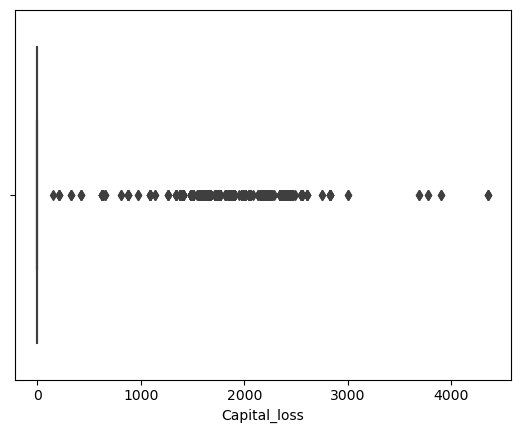

In [123]:
sns.boxplot(num_cols['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week'>

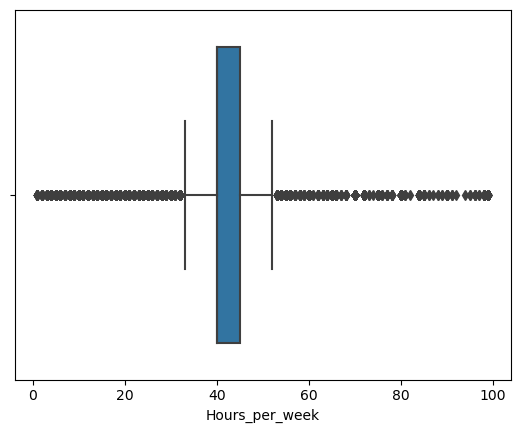

In [124]:
sns.boxplot(num_cols['Hours_per_week'])

We can see outliers present in the numerical columns

### Checking Skewness

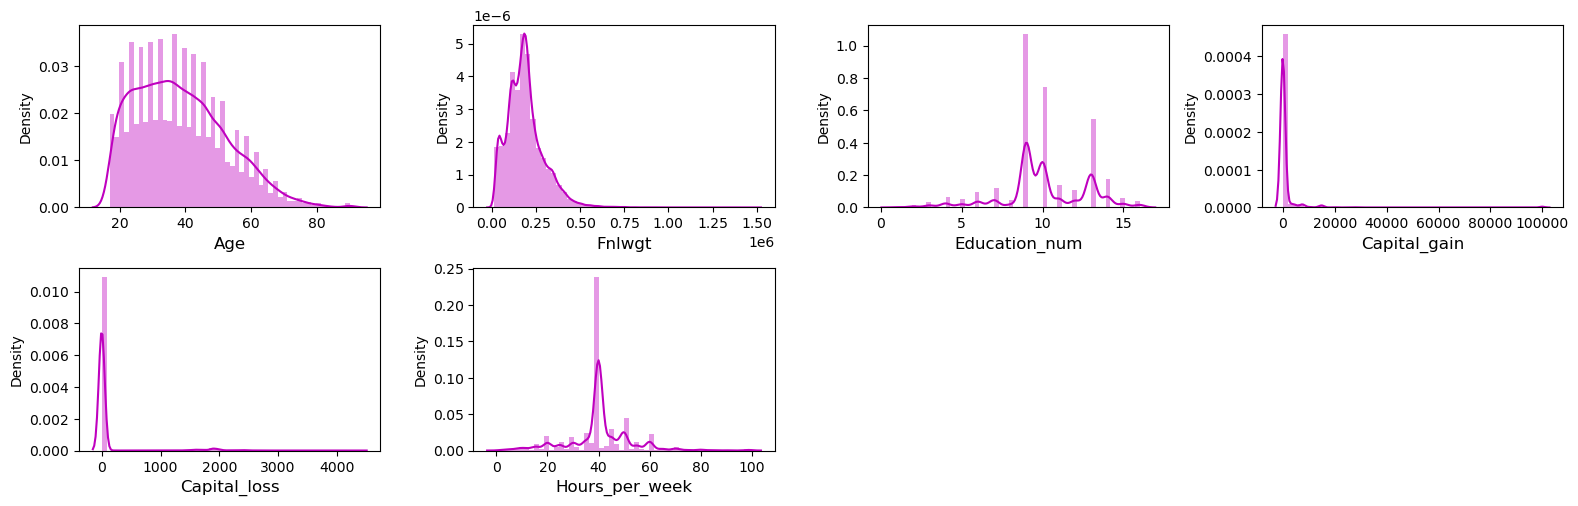

In [126]:
plt.figure(figsize=(16,12))
plotnumber=1
for i in num_cols.columns:
    if plotnumber<=16:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(num_cols[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [128]:
num_cols.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

Skewness is present in Capital Gain and capital Loss column

## Data Cleaning

### Removing the Outliers

In [141]:
#removing the outliers by Z-Score method
from scipy.stats import zscore
z=np.abs(zscore(num_cols))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.008742,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.245046,0.420027,0.145914,0.216663,0.035430
2,1.057031,0.425770,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.408146,1.134779,0.145914,0.216663,0.035430
4,0.115952,0.898170,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.335466,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.358811,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.110927,0.420027,0.145914,0.216663,1.655200


In [130]:
threshold=3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([5, 4, 5, ..., 0, 5, 5], dtype=int64))


In [131]:
df_new=num_cols[(z<3).all(axis=1)]
df_new

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [132]:
num_cols.shape

(32560, 6)

In [133]:
df_new.shape

(29827, 6)

2733 rows are removed as outliers

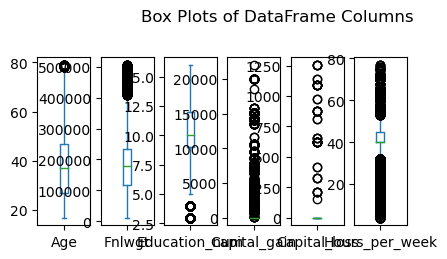

In [134]:
plt.figure
df_new.plot(kind='box',subplots=True,layout=(2,8))
plt.suptitle("Box Plots of DataFrame Columns")
plt.tight_layout()
plt.show()

In [135]:
df_new.skew()

Age                0.491112
Fnlwgt             0.634168
Education_num     -0.170298
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
dtype: float64

## Removing Skewness

In [144]:
#lets find the best method for skewness
import numpy as np
from scipy.stats import skew, boxcox

def skee(a):
    model = [np.sqrt(a), np.log(a), boxcox(a)[0]]
    print('original skewness is:', a.skew())
    print('\n')
    for m in model:
        print('after transformation skewness is:', m.skew())

In [146]:
df_new.skew()

Age                0.491112
Fnlwgt             0.634168
Education_num     -0.170298
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
dtype: float64

## Encoding Categorical Columns

In [149]:
from sklearn.preprocessing import LabelEncoder
cat_cols.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    cat_cols[col] = le.fit_transform(cat_cols[col])
    label_encoders[col] = le

In [150]:
cat_cols.dtypes

Workclass         int32
Education         int32
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Native_country    int32
Income            int32
dtype: object

## CONCATINATING numerical column and Categorical Columns

In [151]:
df1=pd.merge(df_new,cat_cols,left_index=True,right_index=True)
df1

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,50,83311,13,0,0,13,6,9,2,4,0,4,1,39,0
1,38,215646,9,0,0,40,4,11,0,6,1,4,1,39,0
2,53,234721,7,0,0,40,4,1,2,6,0,2,1,39,0
3,28,338409,13,0,0,40,4,9,2,10,5,2,0,5,0
4,37,284582,14,0,0,40,4,12,2,4,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,4,7,2,13,5,4,0,39,0
32556,40,154374,9,0,0,40,4,11,2,7,0,4,1,39,1
32557,58,151910,9,0,0,40,4,11,6,1,4,4,0,39,0
32558,22,201490,9,0,0,20,4,11,4,1,3,4,1,39,0


In [152]:
df1.shape

(29827, 15)

In [153]:
df1.dtypes

Age               int64
Fnlwgt            int64
Education_num     int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Workclass         int32
Education         int32
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Native_country    int32
Income            int32
dtype: object

## Separating Lables and Features

In [154]:
x=df1.drop('Income',axis=1)
y=df1['Income']

In [155]:
x

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,50,83311,13,0,0,13,6,9,2,4,0,4,1,39
1,38,215646,9,0,0,40,4,11,0,6,1,4,1,39
2,53,234721,7,0,0,40,4,1,2,6,0,2,1,39
3,28,338409,13,0,0,40,4,9,2,10,5,2,0,5
4,37,284582,14,0,0,40,4,12,2,4,5,4,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,4,7,2,13,5,4,0,39
32556,40,154374,9,0,0,40,4,11,2,7,0,4,1,39
32557,58,151910,9,0,0,40,4,11,6,1,4,4,0,39
32558,22,201490,9,0,0,20,4,11,4,1,3,4,1,39


In [156]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 29827, dtype: int32

In [157]:
x.shape

(29827, 14)

In [158]:
y.shape

(29827,)

In [159]:
y.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

## Dealing with Class Imbalance

### Feature Scaling using Standard Scalarization

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,0.887615,-1.077638,1.191339,-0.244441,-0.036972,-2.414481,1.475129,-0.340335,-0.410521,-0.603082,-0.919032,0.393963,0.716230,0.285544
1,-0.010760,0.322068,-0.439450,-0.244441,-0.036972,0.009327,0.093565,0.176238,-1.731049,-0.130823,-0.297840,0.393963,0.716230,0.285544
2,1.112209,0.523824,-1.254844,-0.244441,-0.036972,0.009327,0.093565,-2.406628,-0.410521,-0.130823,-0.919032,-1.957360,0.716230,0.285544
3,-0.759406,1.620531,1.191339,-0.244441,-0.036972,0.009327,0.093565,-0.340335,-0.410521,0.813697,2.186928,-1.957360,-1.396199,-4.129182
4,-0.085625,1.051204,1.599037,-0.244441,-0.036972,0.009327,0.093565,0.434525,-0.410521,-0.603082,2.186928,0.393963,-1.396199,0.285544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29822,-0.834271,0.762663,0.783642,-0.244441,-0.036972,-0.170214,0.093565,-0.856909,-0.410521,1.522086,2.186928,0.393963,-1.396199,0.285544
29823,0.138969,-0.326005,-0.439450,-0.244441,-0.036972,0.009327,0.093565,0.176238,-0.410521,0.105307,-0.919032,0.393963,0.716230,0.285544
29824,1.486532,-0.352067,-0.439450,-0.244441,-0.036972,0.009327,0.093565,0.176238,2.230536,-1.311471,1.565736,0.393963,-1.396199,0.285544
29825,-1.208594,0.172340,-0.439450,-0.244441,-0.036972,-1.786086,0.093565,0.176238,0.910008,-1.311471,0.944544,0.393963,0.716230,0.285544


In [162]:
x.shape

(29827, 14)

In [163]:
y.shape

(29827,)

## Checking for Multicolinearity

### Checking Variance Inflation Factor(VIF)

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,1.180269,Age
1,1.011194,Fnlwgt
2,1.212586,Education_num
3,1.049230,Capital_gain
4,1.002341,Capital_loss
5,1.143376,Hours_per_week
6,1.088124,Workclass
7,1.151152,Education
8,1.137253,Marital_status
9,1.088969,Occupation


## Oversampling

In [165]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=43)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [166]:
y_resampled.value_counts()

0    23173
1    23173
Name: Income, dtype: int64

## Spliting the data for training and testing

In [169]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.30, random_state=43)

In [170]:
x_train.shape

(32442, 14)

In [171]:
x_test.shape

(13904, 14)

In [172]:
y_train.shape

(32442,)

In [173]:
y_test.shape

(13904,)

## Feature Scalling

In [167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [174]:
# Fit the scaler to the training data
scaler.fit(x_train)

StandardScaler()

In [175]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Model Building

### Finding the best random state

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size = 0.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('Best accuracy is', maxAccu, 'at random_state', maxRS)

Best accuracy is 0.9060701956271576 at random_state 57


We got the best accuracy of 0.90 at random state 57

In [177]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [178]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
bc=BaggingClassifier()
et=ExtraTreesClassifier()

In [179]:
print('Accuracy score, Confusion Matrix and Classification report for different Models')
print('\n')
models=[lg,gnb,svc,dtc,knn,add,rf,gb,bc,et]
best_accuracy=0
best_model=None
for m in models:
    x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.30,random_state=57)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    
    
    #Evaluate the model
    accuracy=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(round((accuracy_score(y_test,pred)),3))
    print('Confusion Matrix of',m)
    print(confusion_matrix(y_test,pred))
    print('Classification Report of',m)
    print(classification_report(y_test,pred))
    print('\n')
    
    if accuracy>best_accuracy:
        best_model=m
        best_accuracy=accuracy
        best_pred=pred
        
print('\nBest Performing Model:',best_model)
print('Accuracy Score:',round(best_accuracy,3))

Accuracy score, Confusion Matrix and Classification report for different Models


Accuracy score of LogisticRegression()
0.77
Confusion Matrix of LogisticRegression()
[[5298 1686]
 [1509 5411]]
Classification Report of LogisticRegression()
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      6984
           1       0.76      0.78      0.77      6920

    accuracy                           0.77     13904
   macro avg       0.77      0.77      0.77     13904
weighted avg       0.77      0.77      0.77     13904



Accuracy score of GaussianNB()
0.785
Confusion Matrix of GaussianNB()
[[5324 1660]
 [1326 5594]]
Classification Report of GaussianNB()
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      6984
           1       0.77      0.81      0.79      6920

    accuracy                           0.79     13904
   macro avg       0.79      0.79      0.79     13904
weighted avg       0.79 

##### ExtraTreesClassifier is out best model with accuracy score of 0.912

## Cross Validation Score

In [180]:
from sklearn.model_selection import cross_val_score
models=[lg,gnb,svc,dtc,knn,add,rf,gb,bc,et]
for m in models:
    score=cross_val_score(m,x_resampled,y_resampled,cv=5)
    print(m,'Cross Validation score is:')
    print(round(score.mean(),3))
    
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Difference between Accuracy and cross validation score is:',round(accuracy_score(y_test,pred)-score.mean(),3))
    print('\n')

LogisticRegression() Cross Validation score is:
0.765
Difference between Accuracy and cross validation score is: 0.005


GaussianNB() Cross Validation score is:
0.78
Difference between Accuracy and cross validation score is: 0.006


SVC() Cross Validation score is:
0.835
Difference between Accuracy and cross validation score is: 0.005


DecisionTreeClassifier() Cross Validation score is:
0.853
Difference between Accuracy and cross validation score is: 0.002


KNeighborsClassifier() Cross Validation score is:
0.864
Difference between Accuracy and cross validation score is: -0.005


AdaBoostClassifier() Cross Validation score is:
0.848
Difference between Accuracy and cross validation score is: 0.007


RandomForestClassifier() Cross Validation score is:
0.901
Difference between Accuracy and cross validation score is: 0.002


GradientBoostingClassifier() Cross Validation score is:
0.863
Difference between Accuracy and cross validation score is: 0.006


BaggingClassifier() Cross Validation 

##### ExtraTreesClassifier is giving the lowest difference between the CV score and cross validation score of 0.001

## Hyper Parameter Tuning

In [181]:
# ExtraTree Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
            'random_state':[10,50,1000],
            'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [182]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [183]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [184]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [185]:
Final_model=ExtraTreesClassifier(criterion='gini',max_depth= 20,n_estimators=300,n_jobs=-2,random_state=1000)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.60069044879172


##### The final model is giving 87.60 perfomance but it can be improved

## Plotting ROC and compare AUC for all the models used

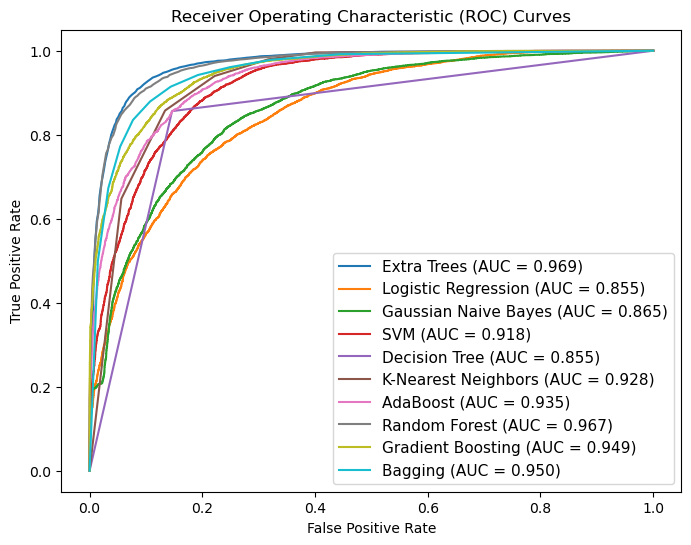

In [186]:
#Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

# Plot the ROC curve for each classifier
classifiers = [
    ('Extra Trees', et),
    ('Logistic Regression', lg),
    ('Gaussian Naive Bayes', gnb),
    ('SVM', svc),
    ('Decision Tree', dtc),
    ('K-Nearest Neighbors', knn),
    ('AdaBoost', add),
    ('Random Forest', rf),
    ('Gradient Boosting', gb),
    ('Bagging', bc)
]

for name, classifier in classifiers:
    if name == 'SVM':
        y_score = classifier.decision_function(x_test)
    else:
        y_score = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Set the legend and display the plot
plt.legend(prop={'size': 11}, loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.show()

## Saving the Model

In [187]:
#Since the Model without Outliers performing best! We will select that DataFrame.

import pickle
filename='wetherprediction.pickle'
pickle.dump(rf,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1, 1, 0, ..., 1, 0, 0])

In [188]:
a =np.array(y_test)
predicted=np.array(rf.predict(x_test))
insurance=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
insurance

,Orginal,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
13899,0,0
13900,1,0
13901,1,1
13902,0,0
